In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Load data
df = pd.read_csv("./data/clean_dataset.csv")

# Handle missing values
df["review_translated_text"] = df["review_translated_text"].fillna("")

# Ensure target is integer
df["rating_bin"] = pd.to_numeric(df["rating_bin"], errors='coerce').fillna(0).astype(int)



In [19]:
# Vectorization
print("Vectorizing text...")
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")

# We use 'review_translated_text' as input features
X = vectorizer.fit_transform(df["review_translated_text"]).toarray()
y = df["rating_bin"].values

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Vectorizing text...
Training set shape: (112265, 5000)
Test set shape: (28067, 5000)


In [ ]:
# Model Definition
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
# Training
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/5
2807/2807 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.8663 - loss: 0.3104 - val_accuracy: 0.8806 - val_loss: 0.2845
Epoch 2/5
2807/2807 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8910 - loss: 0.2647 - val_accuracy: 0.8818 - val_loss: 0.2887
Epoch 3/5
2807/2807 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9032 - loss: 0.2402 - val_accuracy: 0.8815 - val_loss: 0.2983
Epoch 4/5
2807/2807 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9181 - loss: 0.2107 - val_accuracy: 0.8780 - val_loss: 0.3208
Epoch 5/5
2807/2807 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9304 - loss: 0.1818 - val_accuracy: 0.8783 - val_loss: 0.3471


In [28]:
# Evaluation
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification Report
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification report como diccionario
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convertir a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Redondear para mejor visualización
report_df = report_df.round(4)

print(classification_report(y_test, y_pred))

Test Accuracy: 0.8798
878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      9202
           1       0.90      0.93      0.91     18865

    accuracy                           0.88     28067
   macro avg       0.87      0.85      0.86     28067
weighted avg       0.88      0.88      0.88     28067



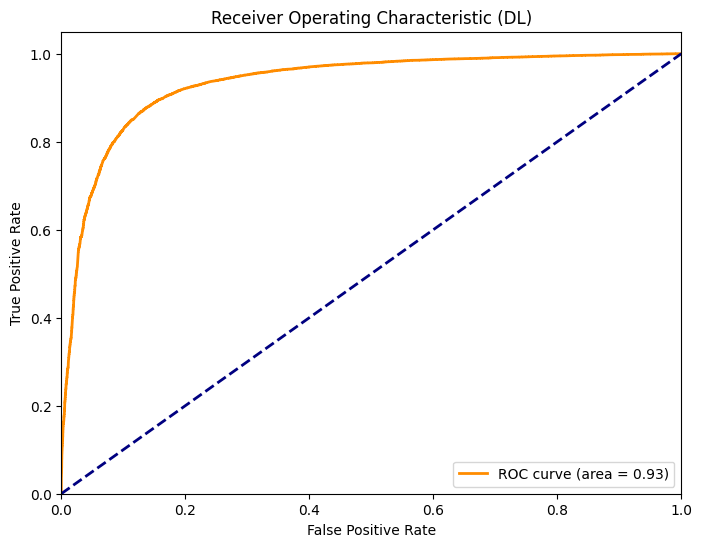

In [30]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DL)')
plt.legend(loc="lower right")
plt.savefig('results/dl_roc_curve.png')
plt.show()



In [24]:
# Save Model
model.save("models/sentiment_nn_model.keras")
print("Model saved to models/sentiment_nn_model.keras")

Model saved to models/sentiment_nn_model.keras
